In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression

df=pd.read_csv('attempts.csv')

estimators = [
    ('onehot', OneHotEncoder()),
    ('lr', LogisticRegression())
]
pipe = Pipeline(estimators)

# Just check the encoded variables
ohe = OneHotEncoder()
print(ohe.fit_transform(df[['student', 'problem']]))

pipe.fit(df[['student', 'problem']], df['solved'])
print(pipe.predict_proba(df[['student', 'problem']]))
cofs=pipe[1].coef_

theta=pd.Series(index=np.sort(df.student.unique()),data=cofs.reshape(-1,)[:-85])
diffik=pd.Series(index=np.sort(df.problem.unique()),data=cofs.reshape(-1,)[-85:])


scv=(-diffik).sort_values().index.values
po=[]
for j in df.problem.values:
    po.append((np.where(scv==j)[0]+1)[0])
df.problem=po    

skv=theta.sort_values().index.values
po=[]
for j in df.student.values:
    po.append((np.where(skv==j)[0]+1)[0])
df.student=po    

diffik=pd.Series(index=np.sort(df.problem.unique()),data=diffik.sort_values().values)
theta=pd.Series(index=np.sort(df.student.unique()),data=theta.sort_values().values)

  (0, 1)	1.0
  (0, 20557)	1.0
  (1, 1)	1.0
  (1, 20567)	1.0
  (2, 1)	1.0
  (2, 20565)	1.0
  (3, 1)	1.0
  (3, 20569)	1.0
  (4, 1)	1.0
  (4, 20566)	1.0
  (5, 1)	1.0
  (5, 20556)	1.0
  (6, 1)	1.0
  (6, 20558)	1.0
  (7, 1)	1.0
  (7, 20603)	1.0
  (8, 1)	1.0
  (8, 20572)	1.0
  (9, 1)	1.0
  (9, 20563)	1.0
  (10, 2)	1.0
  (10, 20557)	1.0
  (11, 2)	1.0
  (11, 20585)	1.0
  (12, 2)	1.0
  :	:
  (285798, 20640)	1.0
  (285799, 20554)	1.0
  (285799, 20569)	1.0
  (285800, 20554)	1.0
  (285800, 20580)	1.0
  (285801, 20554)	1.0
  (285801, 20563)	1.0
  (285802, 20554)	1.0
  (285802, 20565)	1.0
  (285803, 20554)	1.0
  (285803, 20567)	1.0
  (285804, 20554)	1.0
  (285804, 20574)	1.0
  (285805, 20554)	1.0
  (285805, 20575)	1.0
  (285806, 20495)	1.0
  (285806, 20604)	1.0
  (285807, 20555)	1.0
  (285807, 20605)	1.0
  (285808, 20555)	1.0
  (285808, 20598)	1.0
  (285809, 20555)	1.0
  (285809, 20569)	1.0
  (285810, 20555)	1.0
  (285810, 20620)	1.0


/opt/homebrew/anaconda3/envs/newenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[0.01447939 0.98552061]
 [0.0060792  0.9939208 ]
 [0.00706871 0.99293129]
 ...
 [0.03005869 0.96994131]
 [0.04542564 0.95457436]
 [0.12874894 0.87125106]]


In [2]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [2]:
 from scipy.special import expit


In [3]:
def upda_thet(theta,action,K,out):
    probs=expit((theta-action))
    
    return theta+K*(out-probs)

In [5]:
fiffik=diffik-diffik.min()

In [285]:
list_of_stud2=pd.DataFrame(index=range(1,df.student.max()+1),columns=np.arange(0.1,2,0.1))
for k in np.arange(0.1,2,0.1):

    fake_dic_panda_real={}
    for j in range(1,df.student.max()+1):
        m=df[df.student==j]
        fake_dic_panda_real['student_'+str(j)]=pd.DataFrame(index=np.arange(len(m)))
        fake_dic_panda_real['student_'+str(j)]['theta_'+str(j)]=0
        fake_dic_panda_real['student_'+str(j)]['action_'+str(j)]=m.problem.values
        l=[0]
        
        
        for i in range(len(m)):
            l.append(upda_thet(k*l[-1],k*diffik.loc[m.problem.iloc[i]],0.5,m.solved.iloc[i]))
            
        
        fake_dic_panda_real['student_'+str(j)]['theta_'+str(j)]=l[:-1]
        
        fake_dic_panda_real['student_'+str(j)]['new_theta_'+str(j)]=l[1:]
        list_of_stud2.loc[j,k]=l[1:][-1]

/var/folders/rh/v2m3z36j1j71mqlvn91zps5c0000gn/T/ipykernel_39286/4033946986.py:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))
/var/folders/rh/v2m3z36j1j71mqlvn91zps5c0000gn/T/ipykernel_39286/4033946986.py:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))
/var/folders/rh/v2m3z36j1j71mqlvn91zps5c0000gn/T/ipykernel_39286/4033946986.py:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))
/var/folders/rh/v2m3z36j1j71mqlvn91zps5c0000gn/T/ipykernel_39286/4033946986.py:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))
/var/folders/rh/v2m3z36j1j71mqlvn91zps5c0000gn/T/ipykernel_39286/4033946986.py:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))
/var/folders/rh/v2m3z36j1j71mqlvn91zps5c0000gn/T/ipykernel_39286/4033946986.py:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))
/var/folders/rh/v2m3z36j1j71mqlvn91zps5c0000gn/T/ipykernel_39286/4033946986.py:2: Runtim

In [17]:
fake_dic_panda_real={}
for j in range(1,df.student.max()+1):
    m=df[df.student==j]
    fake_dic_panda_real['student_'+str(j)]=pd.DataFrame(index=m.index)
    fake_dic_panda_real['student_'+str(j)]['theta_'+str(j)]=0
    fake_dic_panda_real['student_'+str(j)]['action_'+str(j)]=m.problem.values
    l=[0]
    r=[]
    
    for i in range(len(m)):
        l.append(upda_thet(l[-1],diffik.loc[m.problem.iloc[i]],0.5,m.solved.iloc[i]))
        r.append(((l[-1]-l[-2])>0)*fiffik.loc[m.problem.iloc[i]])
    
    fake_dic_panda_real['student_'+str(j)]['theta_'+str(j)]=l[:-1]
    fake_dic_panda_real['student_'+str(j)]['reward_'+str(j)]=r
    fake_dic_panda_real['student_'+str(j)]['new_theta_'+str(j)]=l[1:]
    fake_dic_panda_real['student_'+str(j)]['student']=np.repeat(j,len(m))

In [5]:
fake_dic_panda_stat={}
for j in range(1,df.student.max()+1):
    m=df[df.student==j]
    fake_dic_panda_stat['student_'+str(j)]=pd.DataFrame(index=np.arange(len(m)))
    fake_dic_panda_stat['student_'+str(j)]['theta_'+str(j)]=theta.loc[j]
    fake_dic_panda_stat['student_'+str(j)]['action_'+str(j)]=m.problem.values
    l=[theta.loc[j]]
    r=[]
    
    for i in range(len(m)):
        l.append(theta.loc[j])
        r.append(0)
    
    fake_dic_panda_stat['student_'+str(j)]['theta_'+str(j)]=l[:-1]
    fake_dic_panda_stat['student_'+str(j)]['reward_'+str(j)]=r
    fake_dic_panda_stat['student_'+str(j)]['new_theta_'+str(j)]=l[1:]

In [7]:

data_buf_state=np.concatenate([fake_dic_panda_stat['student_'+str(j)].values for j in range(1,20556)],axis=0)
data_buf_state=np.around(data_buf_state,decimals=1)
dbf_state=pd.DataFrame(columns=['theta','action','reward','new_theta'],data=data_buf_state)
empire_proba=pd.DataFrame(index=dbf_state.theta.sort_values().unique(),columns=np.arange(1,86))
for j in dbf_state.theta.sort_values().unique():

    empire_proba.loc[j]=(np.bincount(dbf_state[dbf_state.theta==j].action,minlength=86)/len(dbf_state[dbf_state.theta==j].action))[1:]



NameError: name 'fake_dic_panda_stat' is not defined

In [ ]:
len_stu=df.groupby('student').agg(len)['solved']
moivng_aver=len_stu.rolling(window=20)


,theta_100,action_100,reward_100,new_theta_100,student
190253,0.000000,15,0.000000,-0.436878,100
190259,-0.436878,23,0.000000,-0.789433,100
190262,-0.789433,14,1.755456,-0.677661,100
190264,-0.677661,10,0.000000,-1.088626,100
190268,-1.088626,38,0.000000,-1.266130,100


In [19]:

data_buf=np.concatenate([fake_dic_panda_real['student_'+str(j)]for j in range(1,20556)],axis=0)
print(type(data_buf))
dat_buf=np.around(data_buf,decimals=1)
dbf=pd.DataFrame(columns=['theta','action','reward','new_theta','student'],data=dat_buf)
bandit_dbf=dbf.drop('new_theta',1)


<class 'numpy.ndarray'>


/var/folders/rh/v2m3z36j1j71mqlvn91zps5c0000gn/T/ipykernel_14451/1302340316.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  bandit_dbf=dbf.drop('new_theta',1)


In [75]:
import numpy as np
from sklearn.model_selection import KFold

kf = KFold(n_splits=5,shuffle=True)

ze=kf.split(df.student.unique())
for j in ze:
    print(j)
    bandit_dbf.loc[bandit_dbf.student.isin(j)]


(array([    0,     2,     3, ..., 20553, 20554, 20555]), array([    1,     5,    11, ..., 20528, 20533, 20544]))
(array([    1,     2,     3, ..., 20548, 20549, 20555]), array([    0,    17,    19, ..., 20552, 20553, 20554]))
(array([    0,     1,     2, ..., 20552, 20553, 20554]), array([    3,     6,    18, ..., 20542, 20549, 20555]))
(array([    0,     1,     2, ..., 20553, 20554, 20555]), array([    7,     8,     9, ..., 20531, 20539, 20547]))
(array([    0,     1,     3, ..., 20553, 20554, 20555]), array([    2,     4,    10, ..., 20538, 20546, 20548]))


In [ ]:
plt.figure(figsize=(10, 3))  # Create a single figure with two subplots
plt.subplot(121)
plt.title('Visualization of Direct Method')
sns.heatmap(list_of_mat[-1][0].astype(float), cmap='cool')

plt.subplot(122)
plt.title('Visualization of IPS')
sns.heatmap(list_of_mat[-1][1].astype(float), cmap='cool')

plt.tight_layout()  # This ensures that subplots don't overlap
plt.show()






In [76]:

pe = OffPolicyEvaluation(
    bandit_feedback=bdf_test,
    ope_estimators=[ipw,dm])


In [64]:

a.shape,estimated_rewards_reg.shape

((96465, 85, 1), (96465, 85, 1))

In [68]:
pe.estimate_policy_values(action_dist=a.astype(float),estimated_rewards_by_reg_model=np.zeros(estimated_rewards_reg.shape))

{'ipw': 2.573167004920423, 'dm': 0.0}

Fold 0:
  Train: index=[    0     1     2 ... 20553 20554 20555]
  Test:  index=[   18    26    28 ... 20545 20550 20551]
<class 'numpy.ndarray'> (57770, 85, 1)
off policy learning for direct method result: {'ipw': 2.183982882621365, 'dm': 2.6503447198694463}
off policy learning for IPS result: {'ipw': 2.52026107668676, 'dm': 2.2894056531164253}


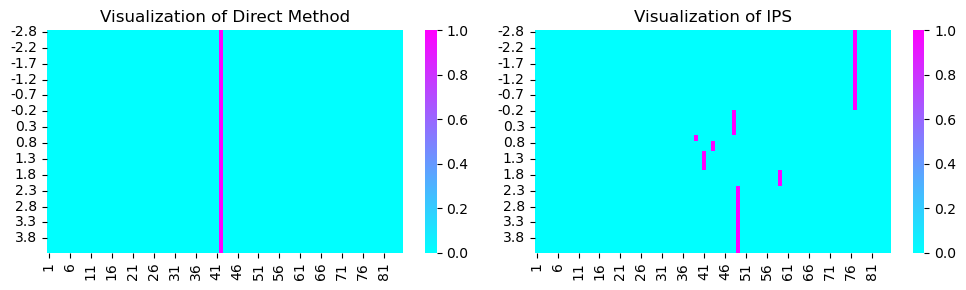

Fold 1:
  Train: index=[    0     3     5 ... 20553 20554 20555]
  Test:  index=[    1     2     4 ... 20540 20543 20547]
<class 'numpy.ndarray'> (56697, 85, 1)
off policy learning for direct method result: {'ipw': 2.2086010494737818, 'dm': 2.619697710175799}
off policy learning for IPS result: {'ipw': 1.3890437807660938, 'dm': 2.341474595249781}


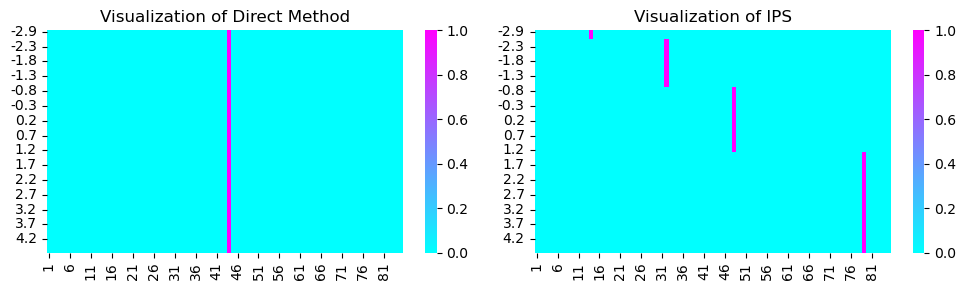

Fold 2:
  Train: index=[    0     1     2 ... 20551 20553 20555]
  Test:  index=[    5    11    19 ... 20549 20552 20554]
<class 'numpy.ndarray'> (57353, 85, 1)
off policy learning for direct method result: {'ipw': 2.5080210860543772, 'dm': 2.612933742996497}
off policy learning for IPS result: {'ipw': 1.7836741200206423, 'dm': 1.9618845234635904}


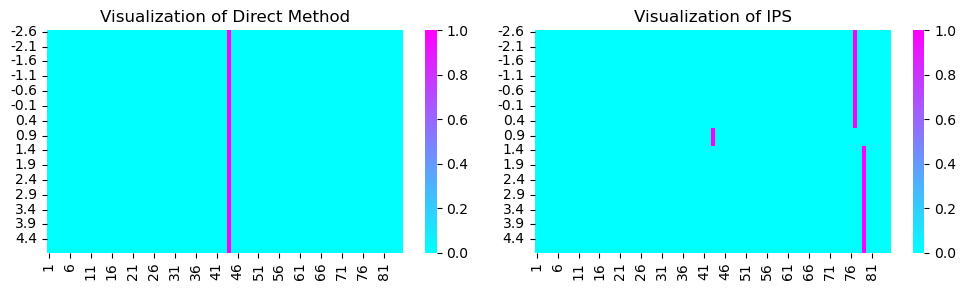

Fold 3:
  Train: index=[    1     2     3 ... 20552 20553 20554]
  Test:  index=[    0     6    13 ... 20542 20548 20555]
<class 'numpy.ndarray'> (56583, 85, 1)
off policy learning for direct method result: {'ipw': 2.4986107870060437, 'dm': 2.6407746142684836}
off policy learning for IPS result: {'ipw': 0.8944674306831357, 'dm': 1.9051032112810777}


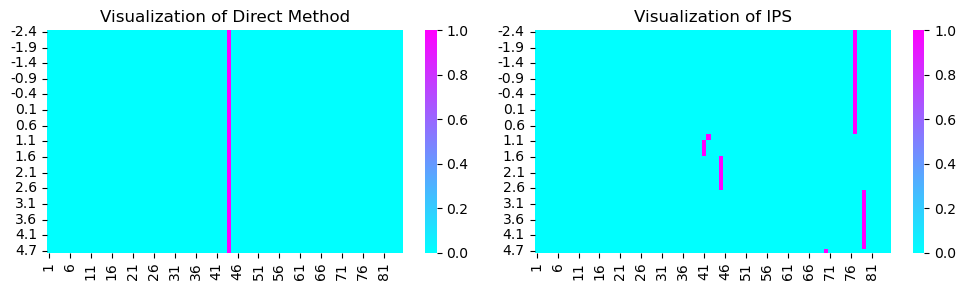

Fold 4:
  Train: index=[    0     1     2 ... 20552 20554 20555]
  Test:  index=[    3     7     8 ... 20536 20544 20553]
<class 'numpy.ndarray'> (57322, 85, 1)
off policy learning for direct method result: {'ipw': 2.196097624601353, 'dm': 2.609958679061064}
off policy learning for IPS result: {'ipw': 0.12277941154480702, 'dm': 2.163694327426869}


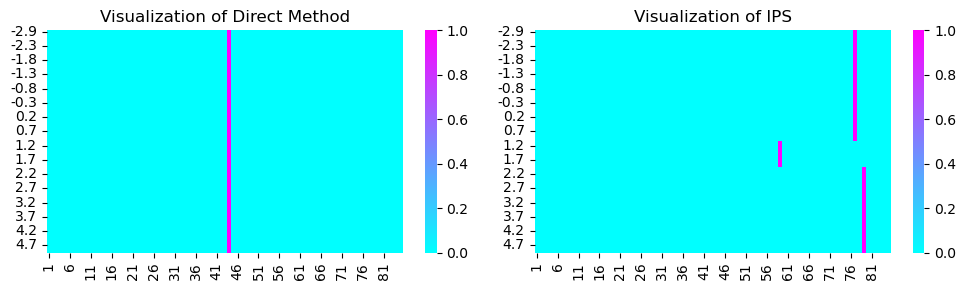

In [77]:
#separating student
list_of_pol=[] 
list_of_mat=[]
for i, (train_index, test_index) in enumerate(kf.split(df.student.unique())):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}")
    print(f"  Test:  index={test_index}")
    data_train=bandit_dbf.loc[bandit_dbf.student.isin(train_index)]
    data_test=bandit_dbf.loc[bandit_dbf.student.isin(test_index)]
    bdf_train=create_obp_data(data_train,expected_reward,behavior_policy)
    bdf_test=create_obp_data(data_test,expected_reward,behavior_policy)
    ope = OffPolicyEvaluation(
    bandit_feedback=bdf_test,
    ope_estimators=[ipw,dm])

    regression_model = RegressionModel(
    n_actions=85,
    base_model=linear_model.LinearRegression())
    estimated_rewards = regression_model.fit(
    context=bdf_train["context"],
    action=bdf_train["action"],
    reward=bdf_train["reward"].astype(float))
    estimated_rewards_reg=regression_model.predict(bdf_test["context"])
    
    a,b=find_policy(bdf_train,bdf_test)
    list_of_pol.append((a,b))
    print(type(a), estimated_rewards_reg.shape)
    print('off policy learning for direct method result:',ope.estimate_policy_values(a,estimated_rewards_by_reg_model=estimated_rewards_reg))
    list_of_mat.append((create_policy_mat(bdf_test,list_of_pol[-1][0]),create_policy_mat(bdf_test,list_of_pol[-1][1])))
    print('off policy learning for IPS result:',ope.estimate_policy_values(b,estimated_rewards_by_reg_model=estimated_rewards_reg))
    plt.figure(figsize=(10, 3))  # Create a single figure with two subplots
    plt.subplot(121)
    plt.title('Visualization of Direct Method')
    sns.heatmap(list_of_mat[-1][0].astype(float), cmap='cool')

    plt.subplot(122)
    plt.title('Visualization of IPS')
    sns.heatmap(list_of_mat[-1][1].astype(float), cmap='cool')

    plt.tight_layout()  # This ensures that subplots don't overlap
    plt.show()

Fold 0:
  Train: index=[     0      2      3 ... 285722 285723 285724]
  Test:  index=[     1      4      5 ... 285712 285715 285716]
off policy learning for direct method result: {'ipw': 2.3967262859969893, 'dm': 2.6344446369998566}
off policy learning for IPS result: {'ipw': 0.5019499893753984, 'dm': 2.342701935757697}


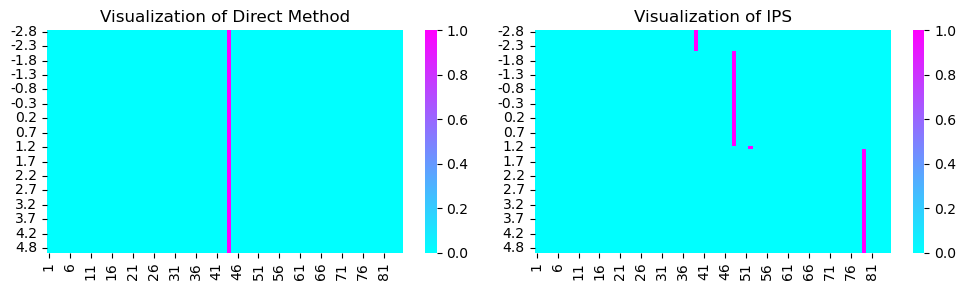

Fold 1:
  Train: index=[     0      1      2 ... 285722 285723 285724]
  Test:  index=[     7      8      9 ... 285702 285708 285718]
off policy learning for direct method result: {'ipw': 2.258326879637225, 'dm': 2.6175167811366453}
off policy learning for IPS result: {'ipw': 1.4996921883157808, 'dm': 1.978694918925644}


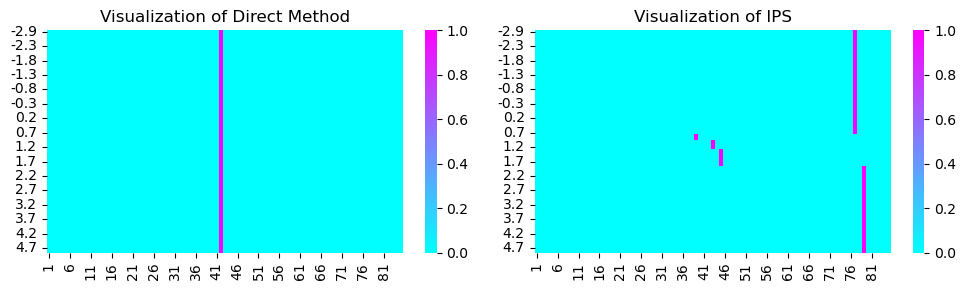

Fold 2:
  Train: index=[     0      1      2 ... 285722 285723 285724]
  Test:  index=[    12     16     23 ... 285707 285709 285713]
off policy learning for direct method result: {'ipw': 1.8494335341138326, 'dm': 2.62324139064916}
off policy learning for IPS result: {'ipw': 0.5724550136629589, 'dm': 2.077608585950114}


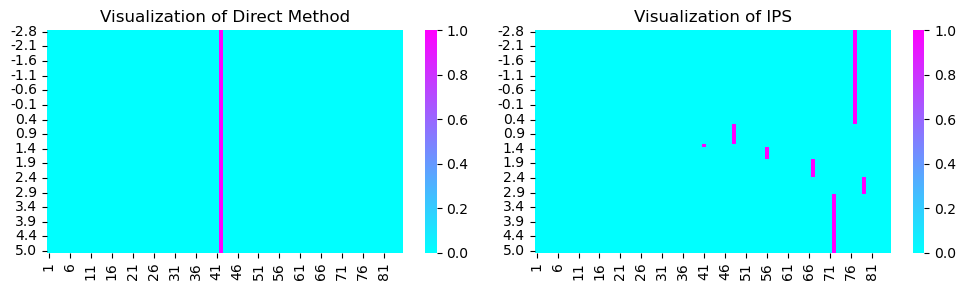

Fold 3:
  Train: index=[     1      4      5 ... 285719 285722 285723]
  Test:  index=[     0      2      3 ... 285720 285721 285724]
off policy learning for direct method result: {'ipw': 2.4077035803230706, 'dm': 2.6305970045929663}
off policy learning for IPS result: {'ipw': 1.4964611524984472, 'dm': 2.0425281238197104}


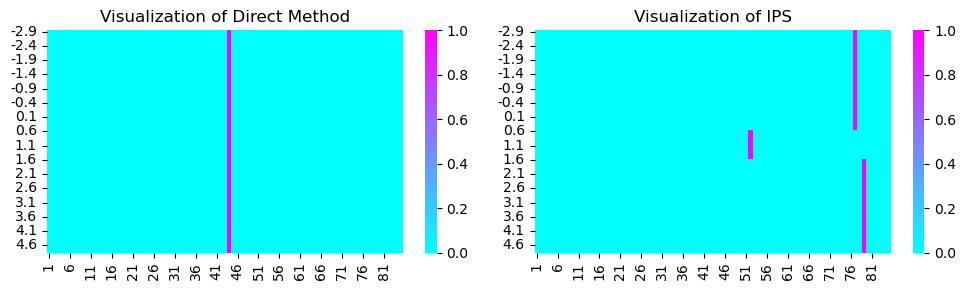

Fold 4:
  Train: index=[     0      1      2 ... 285720 285721 285724]
  Test:  index=[    15     18     19 ... 285719 285722 285723]
off policy learning for direct method result: {'ipw': 2.366767677039898, 'dm': 2.6245048468377252}
off policy learning for IPS result: {'ipw': 2.2297093092756715, 'dm': 2.3427622942090482}


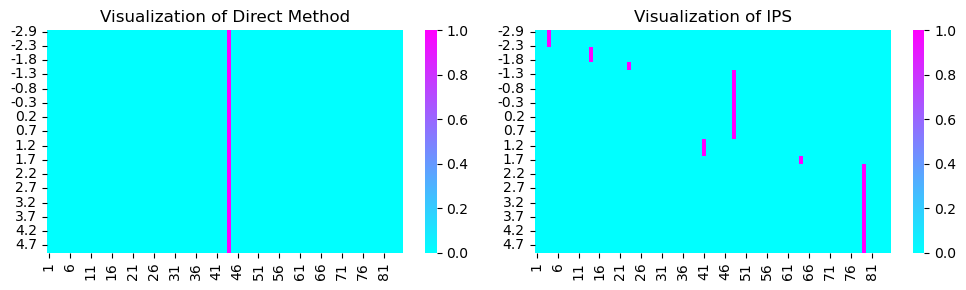

In [78]:
#not separating student
list_of_pol=[] 
list_of_mat=[]
for i, (train_index, test_index) in enumerate(kf.split(bandit_dbf)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}")
    print(f"  Test:  index={test_index}")
    data_train=bandit_dbf.loc[train_index]
    data_test=bandit_dbf.loc[test_index]
    bdf_train=create_obp_data(data_train,expected_reward,behavior_policy)
    bdf_test=create_obp_data(data_test,expected_reward,behavior_policy)
    

    ope = OffPolicyEvaluation(
    bandit_feedback=bdf_test,
    ope_estimators=[ipw,dm])

    regression_model = RegressionModel(
    n_actions=85,
    base_model=linear_model.LinearRegression())
    estimated_rewards = regression_model.fit(
    context=bdf_train["context"],
    action=bdf_train["action"],
    reward=bdf_train["reward"].astype(float))
    estimated_rewards_reg=regression_model.predict(bdf_test["context"])
    
    a,b=find_policy(bdf_train,bdf_test)
    list_of_pol.append((a,b))
    
    print('off policy learning for direct method result:',ope.estimate_policy_values(a,estimated_rewards_by_reg_model=estimated_rewards_reg))
    list_of_mat.append((create_policy_mat(bdf_test,list_of_pol[-1][0]),create_policy_mat(bdf_test,list_of_pol[-1][1])))
    print('off policy learning for IPS result:',ope.estimate_policy_values(b,estimated_rewards_by_reg_model=estimated_rewards_reg))
    plt.figure(figsize=(10, 3))  # Create a single figure with two subplots
    plt.subplot(121)
    plt.title('Visualization of Direct Method')
    sns.heatmap(list_of_mat[-1][0].astype(float), cmap='cool')

    plt.subplot(122)
    plt.title('Visualization of IPS')
    sns.heatmap(list_of_mat[-1][1].astype(float), cmap='cool')

    plt.tight_layout()  # This ensures that subplots don't overlap
    plt.show()

In [32]:

behavior_policy=create_behavior_policy(bandit_dbf,85)


In [312]:
df.problem.max()

85

In [22]:
def create_behavior_policy(data,nb_action):
    
    empire_proba=pd.DataFrame(index=data.theta.sort_values().unique(),columns=np.arange(1,nb_action+1))

    for j in data.theta.sort_values().unique():

        empire_proba.loc[j]=(np.bincount(data[data.theta==j].action,minlength=nb_action+1)/len(data[data.theta==j].action))[1:]

    return empire_proba   

In [24]:
expected_reward=pd.DataFrame(index=dbf.theta.sort_values().unique(),columns=np.arange(1,86))
for j in expected_reward.index:
    for a in range(1,86):
        
    
        expected_reward.loc[j,a]=expit(j-diffik.iloc[a-1])*fiffik.iloc[a-1]

In [15]:
proba_succes=pd.DataFrame(index=dbf.theta.sort_values().unique(),columns=np.arange(1,86))
for j in proba_succes.index:
    for a in range(1,86):
        
    
        proba_succes.loc[j,a]=sigmoid(j-diffik.iloc[a-1])

Text(0.5, 1.0, 'probability of success')

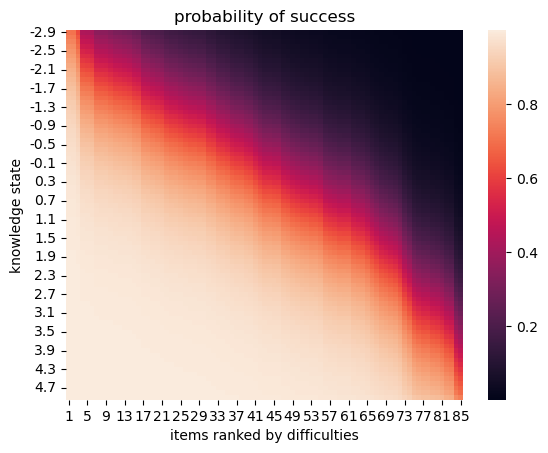

In [51]:
sns.heatmap(proba_succes.astype(float))
plt.xlabel('items ranked by difficulties')
plt.ylabel('knowledge state')
plt.title('probability of success')

In [53]:

tab_of_truth=bandit_dbf.groupby('action').describe()


In [61]:
tab_of_truth['reward']['mean'].sort_values()

action
1.0     0.000000
2.0     0.000000
3.0     0.391910
84.0    0.728435
6.0     1.166968
          ...   
67.0    3.312500
49.0    3.408812
62.0    3.472000
56.0    3.472549
73.0    3.536232
Name: mean, Length: 85, dtype: float64

Text(0.5, 1.0, 'behavioral policy')

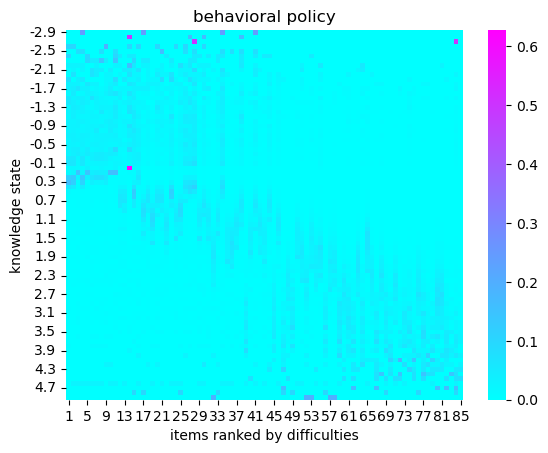

In [372]:
sns.heatmap(empire_proba.astype(float),cmap='cool')
plt.xlabel('items ranked by difficulties')
plt.ylabel('knowledge state')
plt.title('behavioral policy')

Text(0.5, 1.0, 'expected reward')

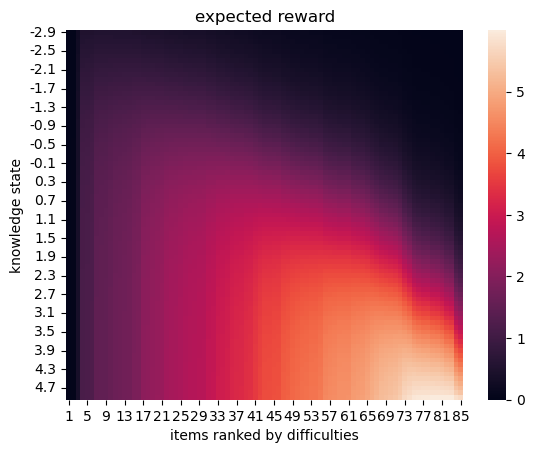

In [373]:
sns.heatmap(expected_reward.astype(float))
plt.xlabel('items ranked by difficulties')
plt.ylabel('knowledge state')
plt.title('expected reward')

In [25]:
 def create_obp_data(data,expected_reward,behavior_policy):

      
    a=data.shape[0]

    bdf_feedback_train={}
    bdf_feedback_train['n_rounds']=a
    bdf_feedback_train['n_actions']=len(data.action.unique())
    bdf_feedback_train['context']=data.theta.values.reshape(a,1)
    bdf_feedback_train['action_context']=np.eye(bdf_feedback_train['n_actions'])
    bdf_feedback_train['action']=data.action.values.astype(int)-1
    bdf_feedback_train['position']=None
    bdf_feedback_train['reward']=data.reward.values
    bdf_feedback_train['expected_reward']=expected_reward.loc[data.theta.values].values
    bdf_feedback_train['pi_b']=behavior_policy.loc[data.theta].values.reshape(a,bdf_feedback_train['n_actions'],1)
    bdf_feedback_train['pscore']=bdf_feedback_train['pi_b'][range(a),data.action.values.astype(int)-1].reshape(a,)

    return bdf_feedback_train



In [17]:
a=bandit_dbf_test.shape[0]
bdf_feedback_test={}
bdf_feedback_test['n_rounds']=a
bdf_feedback_test['n_actions']=85
bdf_feedback_test['context']=bandit_dbf_test.theta.values.reshape(a,1)
bdf_feedback_test['action_context']=np.eye(85)
bdf_feedback_test['action']=bandit_dbf_test.action.values.astype(int)-1
bdf_feedback_test['position']=None
bdf_feedback_test['reward']=bandit_dbf_test.reward.values
bdf_feedback_test['expected_reward']=expected_reward.loc[bandit_dbf_test.theta.values].values
bdf_feedback_test['pi_b']=empire_proba.loc[bandit_dbf_test.theta].values.reshape(a,85,1).astype(float)
bdf_feedback_test['pscore']=bdf_feedback_test['pi_b'][range(a),bandit_dbf_test.action.values.astype(int)-1].reshape(a,)


In [376]:
import pickle 

with open('robo_bdf_train.pkl', 'wb') as f:
    pickle.dump(bdf_feedback_train, f)
with open('robo_bdf_test.pkl', 'wb') as f:
    pickle.dump(bdf_feedback_test, f)

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
import pickle
from sklearn.cluster import KMeans
import seaborn as sns
from obp.dataset import SyntheticBanditDataset
from obp.policy import IPWLearner
from obp.ope import (
    OffPolicyEvaluation,
    RegressionModel,
    InverseProbabilityWeighting as IPW,
    DirectMethod as DM,
    DoublyRobust as DR,
)
from obp.policy import IPWLearner, NNPolicyLearner
from obp.dataset import MultiClassToBanditReduction
from sklearn.model_selection import train_test_split

In [27]:
from obp.policy import QLearner
from obp.ope import SelfNormalizedInverseProbabilityWeighting as SIPW
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
sipw=SIPW()


In [28]:
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.base import ClassifierMixin


In [ ]:
regression_model = RegressionModel(
    n_actions=85,
    base_model=linear_model.LinearRegression(),
)
estimated_rewards_by_reg_model = regression_model.fit_predict(
    context=bdf_feedback_test["context"],
    action=bdf_feedback_test["action"],
    reward=bdf_feedback_test["reward"],
)          

In [ ]:

ipw=IPW()
dm=DM()
dr=DR()

In [29]:
def find_policy(data_train,data_test):    
    qlearner=QLearner(n_actions= data_train['n_actions'],base_model=LinearRegression())
    eval_policy = IPWLearner(n_actions=data_train['n_actions'], base_classifier=LogisticRegression())
    qlearner.fit(
        context=data_train["context"],
        action=data_train["action"],
        reward=data_train["reward"],
        pscore=data_train["pscore"]
    )
    eval_policy.fit(
        context=data_train["context"],
        action=data_train["action"],
        reward=data_train["reward"],
        pscore=data_train["pscore"]
    )

    #obtaining the new policy
    qlearner_dist=qlearner.predict(data_test["context"])
    eval_policy_dist=eval_policy.predict(data_test["context"])

    return qlearner_dist,eval_policy_dist




In [22]:
from obp.policy import ContinuousNNPolicyLearner

In [59]:
estimated_rewards_by_reg_model

array([[[ 0.71691213],
        [ 0.73477115],
        [ 1.17591419],
        ...,
        [ 2.37194879],
        [ 1.79340089],
        [ 2.32984027]],

       [[ 0.12701327],
        [ 0.14487229],
        [ 0.58601533],
        ...,
        [ 1.78204993],
        [ 1.20350203],
        [ 1.73994141]],

       [[-0.06961968],
        [-0.05176066],
        [ 0.38938238],
        ...,
        [ 1.58541698],
        [ 1.00686908],
        [ 1.54330846]],

       ...,

       [[-0.06961968],
        [-0.05176066],
        [ 0.38938238],
        ...,
        [ 1.58541698],
        [ 1.00686908],
        [ 1.54330846]],

       [[ 0.19255759],
        [ 0.21041661],
        [ 0.65155965],
        ...,
        [ 1.84759425],
        [ 1.26904635],
        [ 1.80548573]],

       [[ 0.65136781],
        [ 0.66922683],
        [ 1.11036987],
        ...,
        [ 2.30640447],
        [ 1.72785657],
        [ 2.26429595]]])

In [24]:
nnpolicy=NNPolicyLearner(dim_context=1,n_actions=85,off_policy_objective='ipw',hidden_layer_size=(10,))
nnpolicy.fit(
    context=bdf_feedback_train["context"],
    action=bdf_feedback_train["action"],
    reward=bdf_feedback_train["reward"],
    pscore=bdf_feedback_train["pscore"].astype(float))

policy learning: 100%|██████████| 200/200 [13:45<00:00,  4.13s/it]


In [25]:
optimal_dist=np.zeros((qlearner_dist.shape))
for j in range(optimal_dist.shape[0]):
    optimal_dist[j,expected_reward.loc[bdf_feedback_test['context'][j]].values.argmax()]=1

In [26]:
nn_dist=nnpolicy.predict(bdf_feedback_test['context'])

In [27]:

v_df=pd.DataFrame(index=['policy_of_Neural_Network','policy_of_IPW_logistic_regression','policy_of_DM',
                               'optimal_policy','behavior_policy'],columns=['IPW_estimator','DM_estimator','DR_estimator','ground_truth'])

v_df.loc['policy_of_Neural_Network','IPW_estimator']=ipw.estimate_policy_value(reward=bdf_feedback_test["reward"],
                                  action=bdf_feedback_test["action"],pscore=bdf_feedback_test["pscore"],
                                  action_dist=nn_dist)

v_df.loc['policy_of_IPW_logistic_regression','IPW_estimator']=ipw.estimate_policy_value(reward=bdf_feedback_test["reward"],
                                  action=bdf_feedback_test["action"],pscore=bdf_feedback_test["pscore"],
                                  action_dist=eval_policy_dist)

v_df.loc['policy_of_DM','IPW_estimator']=ipw.estimate_policy_value(reward=bdf_feedback_test["reward"],
                                  action=bdf_feedback_test["action"],pscore=bdf_feedback_test["pscore"],
                                  action_dist=qlearner_dist)

v_df.loc['optimal_policy','IPW_estimator']=ipw.estimate_policy_value(reward=bdf_feedback_test["reward"],
                                  action=bdf_feedback_test["action"],pscore=bdf_feedback_test["pscore"],
                                  action_dist=optimal_dist)
v_df.loc['behavior_policy','IPW_estimator']=ipw.estimate_policy_value(reward=bdf_feedback_test["reward"],
                                  action=bdf_feedback_test["action"],pscore=bdf_feedback_test["pscore"],
                                  action_dist=bdf_feedback_test["pi_b"])

v_df.loc['policy_of_Neural_Network','DR_estimator']=dr.estimate_policy_value(reward=bdf_feedback_test["reward"],
                                  action=bdf_feedback_test["action"],pscore=bdf_feedback_test["pscore"],
                                  action_dist=nn_dist,estimated_rewards_by_reg_model=estimated_rewards_by_reg_model)

v_df.loc['policy_of_IPW_logistic_regression','DR_estimator']=dr.estimate_policy_value(reward=bdf_feedback_test["reward"],
                                  action=bdf_feedback_test["action"],pscore=bdf_feedback_test["pscore"],
                                  action_dist=eval_policy_dist,estimated_rewards_by_reg_model=estimated_rewards_by_reg_model)

v_df.loc['policy_of_DM','DR_estimator']=dr.estimate_policy_value(reward=bdf_feedback_test["reward"],
                                  action=bdf_feedback_test["action"],pscore=bdf_feedback_test["pscore"],
                                  action_dist=qlearner_dist,estimated_rewards_by_reg_model=estimated_rewards_by_reg_model)

v_df.loc['optimal_policy','DR_estimator']=dr.estimate_policy_value(reward=bdf_feedback_test["reward"],
                                  action=bdf_feedback_test["action"],pscore=bdf_feedback_test["pscore"],
                                  action_dist=optimal_dist,estimated_rewards_by_reg_model=estimated_rewards_by_reg_model)
v_df.loc['behavior_policy','DR_estimator']=dr.estimate_policy_value(reward=bdf_feedback_test["reward"],
                                  action=bdf_feedback_test["action"],pscore=bdf_feedback_test["pscore"],
                                  action_dist=bdf_feedback_test["pi_b"],estimated_rewards_by_reg_model=estimated_rewards_by_reg_model)

v_df.loc['policy_of_Neural_Network','DM_estimator']=dm.estimate_policy_value(reward=bdf_feedback_test["reward"],
                                  action=bdf_feedback_test["action"],pscore=bdf_feedback_test["pscore"],
                                  action_dist=nn_dist,estimated_rewards_by_reg_model=estimated_rewards_by_reg_model)

v_df.loc['policy_of_IPW_logistic_regression','DM_estimator']=dm.estimate_policy_value(reward=bdf_feedback_test["reward"],
                                  action=bdf_feedback_test["action"],pscore=bdf_feedback_test["pscore"],
                                  action_dist=eval_policy_dist,estimated_rewards_by_reg_model=estimated_rewards_by_reg_model)

v_df.loc['policy_of_DM','DM_estimator']=dm.estimate_policy_value(reward=bdf_feedback_test["reward"],
                                  action=bdf_feedback_test["action"],pscore=bdf_feedback_test["pscore"],
                                  action_dist=qlearner_dist,estimated_rewards_by_reg_model=estimated_rewards_by_reg_model)

v_df.loc['optimal_policy','DM_estimator']=dm.estimate_policy_value(reward=bdf_feedback_test["reward"],
                                  action=bdf_feedback_test["action"],pscore=bdf_feedback_test["pscore"],
                                  action_dist=optimal_dist,estimated_rewards_by_reg_model=estimated_rewards_by_reg_model)
v_df.loc['behavior_policy','DM_estimator']=dm.estimate_policy_value(reward=bdf_feedback_test["reward"],
                                  action=bdf_feedback_test["action"],pscore=bdf_feedback_test["pscore"],
                                  action_dist=bdf_feedback_test["pi_b"],estimated_rewards_by_reg_model=estimated_rewards_by_reg_model)



In [28]:

v_df.loc['policy_of_Neural_Network','ground_truth']=np.average(bdf_feedback_test["expected_reward"], weights=nn_dist[:, :, 0], axis=1).mean()

v_df.loc['policy_of_IPW_logistic_regression','ground_truth']=np.average(bdf_feedback_test["expected_reward"], weights=eval_policy_dist[:, :, 0], axis=1).mean()


v_df.loc['policy_of_DM','ground_truth']=np.average(bdf_feedback_test["expected_reward"], weights=qlearner_dist[:, :, 0], axis=1).mean()


v_df.loc['optimal_policy','ground_truth']=np.average(bdf_feedback_test["expected_reward"], weights=optimal_dist[:, :, 0], axis=1).mean()

v_df.loc['behavior_policy','ground_truth']=np.average(bdf_feedback_test["expected_reward"], weights=bdf_feedback_test['pi_b'][:, :, 0], axis=1).mean()


In [37]:
v_df

,IPW_estimator,DM_estimator,DR_estimator,ground_truth
policy_of_Neural_Network,1.932188,2.303758,2.437867,2.340027
policy_of_IPW_logistic_regression,1.998399,2.234533,2.393843,2.344504
policy_of_DM,2.247695,2.534203,2.376456,2.261722
optimal_policy,2.519555,2.274996,2.547221,2.375415
behavior_policy,1.735811,1.720361,1.737068,1.655635


In [30]:
def create_policy_mat(data_test,dist):

    gamma=data_test["context"].reshape(-1,)
    context_in_test=pd.Series(gamma).drop_duplicates().sort_values().index.values
    prob_mat_dist=pd.DataFrame(index=pd.Series(gamma).drop_duplicates().sort_values().values,columns=np.arange(1,data_test['n_actions']+1))

    prob_mat_dist.loc[:,:]=dist.reshape(len(data_test['context']), data_test['n_actions'])[context_in_test]
    return prob_mat_dist

Text(0.5, 1.0, 'policy found with a neural network')

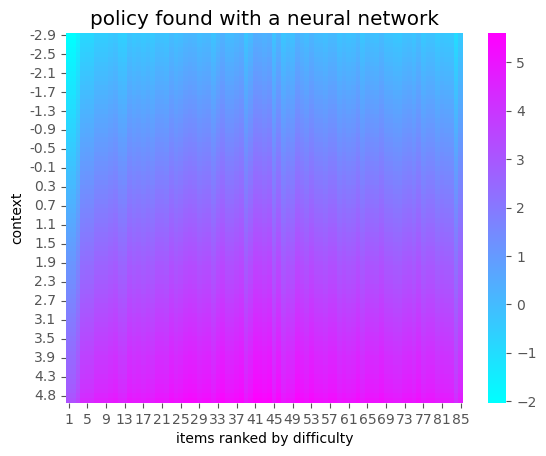

In [64]:
sns.heatmap(prob_mat_dist.astype(float),cmap='cool',cbar=True)
plt.xlabel('items ranked by difficulty')
plt.ylabel('context')
plt.title('policy found with a neural network')

In [37]:
ope = OffPolicyEvaluation(
    bandit_feedback=bdf_feedback_test,
    ope_estimators=[ipw,dm,dr]
)
dir(ope)

NameError: name 'bdf_feedback_test' is not defined

/Users/samuelgirard/zr-obp/obp/ope/meta.py:640: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95.0)` for the same effect.

  sns.barplot(


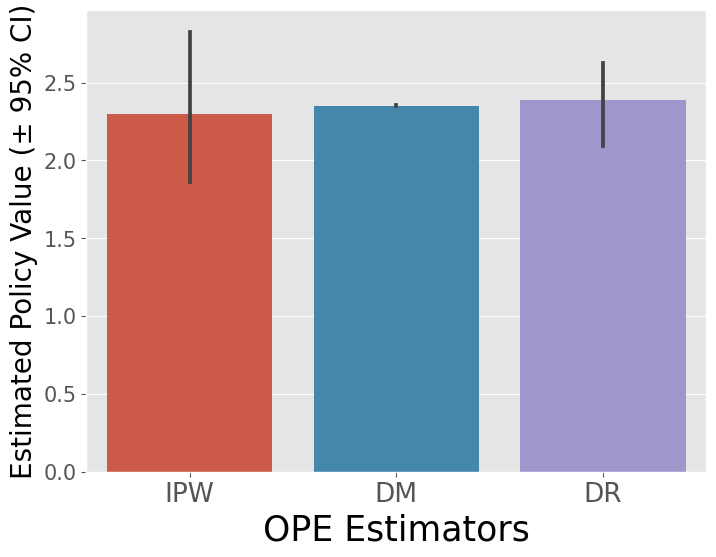

In [53]:
ope.visualize_off_policy_estimates()